Predict the category of a claim based on features available in the process, helping BNP Paribas Cardif accelerate its claims process and therefore provide a better service to its customers

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

import missingno as msno

from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import roc_auc_score, mean_squared_error, \
    accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import LocalOutlierFactor

import category_encoders as ce

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

plt.style.use('ggplot')
%matplotlib inline

 https://www.kaggle.com/c/bnp-paribas-cardif-claims-management/overview
 

In [3]:
data = pd.read_csv('./data/bnp_paribas.csv')
data.shape

(114321, 133)

In [4]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.

In [5]:
data.dtypes

ID          int64
target      int64
v1        float64
v2        float64
v3         object
v4        float64
v5        float64
v6        float64
v7        float64
v8        float64
v9        float64
v10       float64
v11       float64
v12       float64
v13       float64
v14       float64
v15       float64
v16       float64
v17       float64
v18       float64
v19       float64
v20       float64
v21       float64
v22        object
v23       float64
v24        object
v25       float64
v26       float64
v27       float64
v28       float64
v29       float64
v30        object
v31        object
v32       float64
v33       float64
v34       float64
v35       float64
v36       float64
v37       float64
v38         int64
v39       float64
v40       float64
v41       float64
v42       float64
v43       float64
v44       float64
v45       float64
v46       float64
v47        object
v48       float64
v49       float64
v50       float64
v51       float64
v52        object
v53       float64
v54       

In [6]:
# drop ID
data = data.drop(['ID'], axis=1)

In [7]:
data.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,v29,v30,v31,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v47,v48,v49,v50,v51,v52,v53,v54,v55,v56,v57,v58,v59,v60,v61,v62,v63,v64,v65,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75,v76,v77,v78,v79,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v91,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v107,v108,v109,v110,v111,v112,v113,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,XDX,-1.716131e-08,C,0.139412,1.720818,3.393503,0.590122,8.880867,C,A,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,C,12.171733,8.086643,0.899420,7.277792,G,16.747968,0.037096,1.299638,DI,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,C,9.314079,15.231789,17.142857,11.784549,F,1,1.614988,B,D,2.230940,7.292418,8.571429,E,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,A,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,E,2.382692,3.930922,B,0.433213,O,NaN,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,GUV,NaN,C,3.056144,NaN,NaN,NaN,NaN,C,A,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,E,NaN,NaN,1.379210,NaN,G,NaN,1.129469,NaN,DY,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,A,NaN,NaN,NaN,12.053353,F,2,NaN,B,D,NaN,NaN,NaN,D,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,B,1.825361,4.247858,A,NaN,U,G,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,FQ,-2.785053e-07,E,0.113997,2.244897,5.306122,0.836005,7.499999,NaN,A,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,C,12.711328,6.836734,0.604504,9.637627,F,15.102041,0.085573,0.765305,AS,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,A,8.367347,11.040463,5.882353,8.460654,B,3,2.413618,B,B,1.963971,5.918368,11.764705,E,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,G,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,C,1.375753,1.184211,B,3.367348,S,NaN,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,ACUE,-4.805344e-07,D,0.148843,1.308269,2.303640,8.926662,8.874521,C,B,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,C,12.194855,8.591954,3.329176,4.780357,H,16.621695,0.139721,1.178161,BW,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,A,9.703065,18.568129,9.425288,13.594728,F,2,2.272541,B,D,2.188198,8.213602,13.448277,B,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.747144,1.40

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114321 entries, 0 to 114320
Columns: 132 entries, target to v131
dtypes: float64(108), int64(5), object(19)
memory usage: 115.1+ MB


In [9]:
data.describe()

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,1.142370e+05,6.448500e+04,1.142350e+05,6.448900e+04,1.143170e+05,6.448500e+04,6.442600e+04,6.452500e+04,6.448900e+04,6.447800e+04,64481.000000,113710.000000,6.364600e+04,65702.000000,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,6.448900e+04,1.142100e+05,6.448900e+04,6.569700e+04,6.447800e+04,114321.000000,6.448500e+04,1.142100e+05,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,65702.000000,6.452500e+04,6.448900e+04,1.142350e+05,6.364300e+04,6.448500e+04,65702.000000,6.448900e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.448900e+04,6.452500e+04,114321.000000,65702.000000,6.452500e+04,64481.000000,6.448900e+04,64485.000000,6.442600e+04,65685.000000,114321.000000,6.448500e+04,6.452500e+04,6.448900e+04,6.442600e+04,6.447000e+04,6.569700e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.363900e+04,6.448900e+04,65658.000000,6.448900e+04,65702.000000,6.448500e+04,6.447800e+04,6.448900e+04,6.448900e+04,6.447800e+04,6.448900e+04,6.447800e+04,6.566700e+04,6.448900e+04,6.448500e+04,6.452500e+04,6.300500e+04,6.448900e+04,6.448900e+04,65663.000000,6.452500e+04,6.569700e+04,6.569700e+04,6.448900e+04,1.142910e+05,6.442600e+04,6.448500e+04,6.569700e+04,6.447800e+04,6.364100e+04,6.448500e+04,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,1.883046e+00,1.544741e+01,6.881304e+00,3.798396e+00,1.209428e+01,2.080911e+00,4.923222e+00,3.832270e+00,8.410455e-01,2.223005e-01,17.773592,7.029740,1.093088e+00,1.698129,1.876031e+00,2.743454e+00,5.093328e+00,8.206416e+00,1.622151e+00,2.161633e+00,6.406236e+00,8.122387e+00,1.337560e+01,7.414708e-01,0.090928,1.237184e+00,1.046593e+01,7.182551e+00,1.292497e+01,2.216597e+00,1.079517e+01,9.142231e+00,1.630525,1.253802e+01,8.016547e+00,1.504265e+00,7.198159e+00,1.571130e+01,1.253856,1.559556e+00,4.077828e+00,7.701653e+00,1.058794e+01,1.714294e+00,1.458303e+01,1.030694,1.687327,6.343713e+00,15.847557,9.287275e+00,17.564117,9.449335e+00,12.269960,1.431767,2.433303e+00,2.405056e+00,7.307366e+00,1.333448e+01,2.209700e+00,7.287174e+00,6.208356e+00,2.173808e+00,1.607956e+00,2.822253e+00,1.220184e+00,10.180216,1.924184e+00,1.518425,9.669126e-01,5.823668e-01,5.475185e+00,3.852883e+00,6.657576e-01,6.457952e+00,7.622554e+00,7.667624e+00,1.250721e+00,1.209162e+01,6.866414e+00,2.890289e+00,5.296716e+00,2.642828e+00,1.081045,1.179136e+01,2.152620e+00,4.181284e+00,3.365314e+00,1.357445e+01,1.054805e+01,2.291218e+00,8.303857e+00,8.364651e+00,3.168970e+00,1.291218e+00,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,1.393979e+00,7.900790e-01,9.244945e-01,1.175892e+00,1.443947e+00,7.329166e-01,1.791187e+00,1.911504e+00,6.162762e-01,1.713459e-01,1.155002,1.072271,4.003695e+00,2.956854,5.511957e-01,8.343556e-01,2.677940e+00,1.285432e+00,5.635237e-01,9.848598e-01,2.025179e+00,1.339802e+00,2.355631e+00,5.413723e-01,0.583478,2.358155e+00,3.169183e+00,1.004472e+00,9.969760e-01,6.479912e-01,2.110887e+00,2.064508e+00,2.895831,2.196164e+00,9.026805e-01,1.168329e+00,2.510385e+00,7.993680e-01,2.314476,8.343910e-01,6.780415e-01,6.841238e+0

## Data types 

Devide our data in numerical and categorical variables

In [10]:
num_dtypes = ['int16','int32','int64','float16','float32','float64']
numerical_features = list(data.select_dtypes(include=num_dtypes))
categorical_features = list(data.select_dtypes(include='object'))

In [11]:
data_numerical = data[numerical_features].copy()
data_categorical = data[categorical_features].copy()

In [12]:
data_numerical.head()

,target,v1,v2,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v23,v25,v26,v27,v28,v29,v32,v33,v34,v35,v36,v37,v38,v39,v40,v41,v42,v43,v44,v45,v46,v48,v49,v50,v51,v53,v54,v55,v57,v58,v59,v60,v61,v62,v63,v64,v65,v67,v68,v69,v70,v72,v73,v76,v77,v78,v80,v81,v82,v83,v84,v85,v86,v87,v88,v89,v90,v92,v93,v94,v95,v96,v97,v98,v99,v100,v101,v102,v103,v104,v105,v106,v108,v109,v111,v114,v115,v116,v117,v118,v119,v120,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
0,1,1.335739,8.727474,3.921026,7.915266,2.599278,3.176895,0.012941,9.999999,0.503281,16.434108,6.085711,2.866830,11.636387,1.355013,8.571429,3.670350,0.106720,0.148883,18.869283,7.730923,-1.716131e-08,0.139412,1.720818,3.393503,0.590122,8.880867,1.083033,1.010829,7.270147,8.375452,11.326592,0.454546,0,4.012088,7.711453,7.653429,12.707581,2.015505,10.498338,9.848672,0.113561,12.171733,8.086643,0.899420,7.277792,16.747968,0.037096,1.299638,3.971118,0.529802,10.890984,1.588448,15.858152,1,0.153461,6.363189,18.303925,9.314079,15.231789,17.142857,11.784549,1,1.614988,2.230940,7.292418,8.571429,3.000000,7.528326,8.861647,0.649820,1.299638,1.707317,0.866426,9.551836,3.321300,0.095678,0.905342,0.442252,5.814018,3.517720,0.462019,7.436824,5.454545,8.877414,1.191337,19.470199,8.389237,2.757375,4.374296,1.574039,0.007294,12.579184,2.382692,3.930922,0.433213,15.634907,2.857144,1.951220,6.592012,5.909091,-6.297423e-07,1.059603,0.803572,8.000000,1.989780,0.035754,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,1,NaN,NaN,NaN,9.191265,NaN,NaN,2.301630,NaN,1.312910,NaN,6.507647,NaN,11.636386,NaN,NaN,NaN,NaN,NaN,NaN,6.763110,NaN,3.056144,NaN,NaN,NaN,NaN,NaN,NaN,3.615077,NaN,14.579479,NaN,0,NaN,14.305766,NaN,NaN,NaN,NaN,NaN,2.449959,NaN,NaN,1.379210,NaN,NaN,1.129469,NaN,NaN,NaN,NaN,NaN,NaN,2,2.544736,NaN,NaN,NaN,NaN,NaN,12.053353,2,NaN,NaN,NaN,NaN,NaN,7.277655,3.430691,NaN,NaN,NaN,NaN,9.848004,NaN,2.678584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.303967,NaN,NaN,NaN,NaN,NaN,NaN,1.505335,NaN,1.825361,4.247858,NaN,10.308044,NaN,NaN,10.595357,NaN,NaN,NaN,NaN,NaN,NaN,0.598896,NaN,NaN,1.957825,0,NaN,NaN
2,1,0.943877,5.310079,4.410969,5.326159,3.979592,3.928571,0.019645,12.666667,0.765864,14.756098,6.384670,2.505589,9.603542,1.984127,5.882353,3.170847,0.244541,0.144258,17.952332,5.245035,-2.785053e-07,0.113997,2.244897,5.306122,0.836005,7.499999,1.454082,1.734693,4.043864,7.959184,12.730517,0.259740,0,7.378964,13.077201,6.173469,12.346939,2.926830,8.897561,5.343819,0.126035,12.711328,6.836734,0.604504,9.637627,15.102041,0.085573,0.765305,4.030613,4.277456,9.105481,2.151361,16.075602,1,0.123643,5.517949,16.377205,8.367347,11.040463,5.882353,8.460654,3,2.413618,1.963971,5.918368,11.764705,3.333334,10.194433,8.266200,1.530611,1.530613,2.429906,1.071429,8.447465,3.367346,0.111388,0.811447,0.271480,5.156559,4.214944,0.309657,5.663265,5.974026,11.588858,0.841837,15.491329,5.879353,3.292788,5.924457,1.668401,0.008275,11.670572,1.375753,1.184211,3.367348,11.205561,12.941177,3.129253,3.478911,6.233767,-2.792745e-07,2.138728,2.238806,9.333333,2.477596,0.013452,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,1,0.797415,8.304757,4.225930,11.627438,2.097700,1.987549,0.171947,8.965516,6.542669,16.347483,9.646653,3.903302,14.094723,1.945044,5.517242,3.610789,1.224114,0.231630,18.376407,7.517125,-4.805344e-07,0.148843,1.308269,2.303640,8.926662,8.874521,1.587644,1.666667,8.703550,8.898468,11.302795,0.433735,0,0.287322,11.523045,7.931035,12.935823,1.470878,12.708574,9.670823,0.108387,12.194855,8.591954,3.329176,4.780357,16.621695,0.139721,1.178161,3.965517,1.732102,11.777912,1.229246,15.927390,1,0.140260,6.292979,17.011645,9.703065,18.568129,9.425288,13.594728,2,2.272541,2.188198,8.213602,13.448277,1.947261,4.797873,13.315819,1.681034,1.379310,1.587045,1.242817,10.747144,1.408046,0.039051,1.042425,0.763925,5.498902,3.423944,0.832518,7.375480,6.746988,6.942002,1.334611,18.256352,8.507281,2.503055,4.872157,2.573664,0.113967,12.554274,2.230754,1.990131,2.643678,13.777666,10.574713,1.511063,4.949609,7.180722,5.65508

In [13]:
data_categorical.head()

,v3,v22,v24,v30,v31,v47,v52,v56,v66,v71,v74,v75,v79,v91,v107,v110,v112,v113,v125
0,C,XDX,C,C,A,C,G,DI,C,F,B,D,E,A,E,B,O,NaN,AU
1,C,GUV,C,C,A,E,G,DY,A,F,B,D,D,B,B,A,U,G,AF
2,C,FQ,E,NaN,A,C,F,AS,A,B,B,B,E,G,C,B,S,NaN,AE
3,C,ACUE,D,C,B,C,H,BW,A,F,B,D,B,B,B,B,J,NaN,CJ
4,C,HIT,E,NaN,A,I,H,NaN,C,F,B,D,C,G,C,A,T,G,Z


## Visualization 

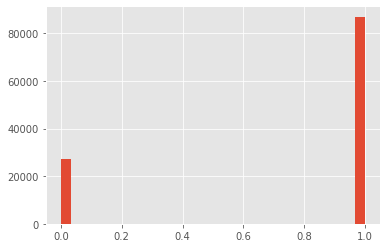

In [14]:
data.target.hist(bins=30)
# target class 0 and class 1
# we can see disbalance between classes

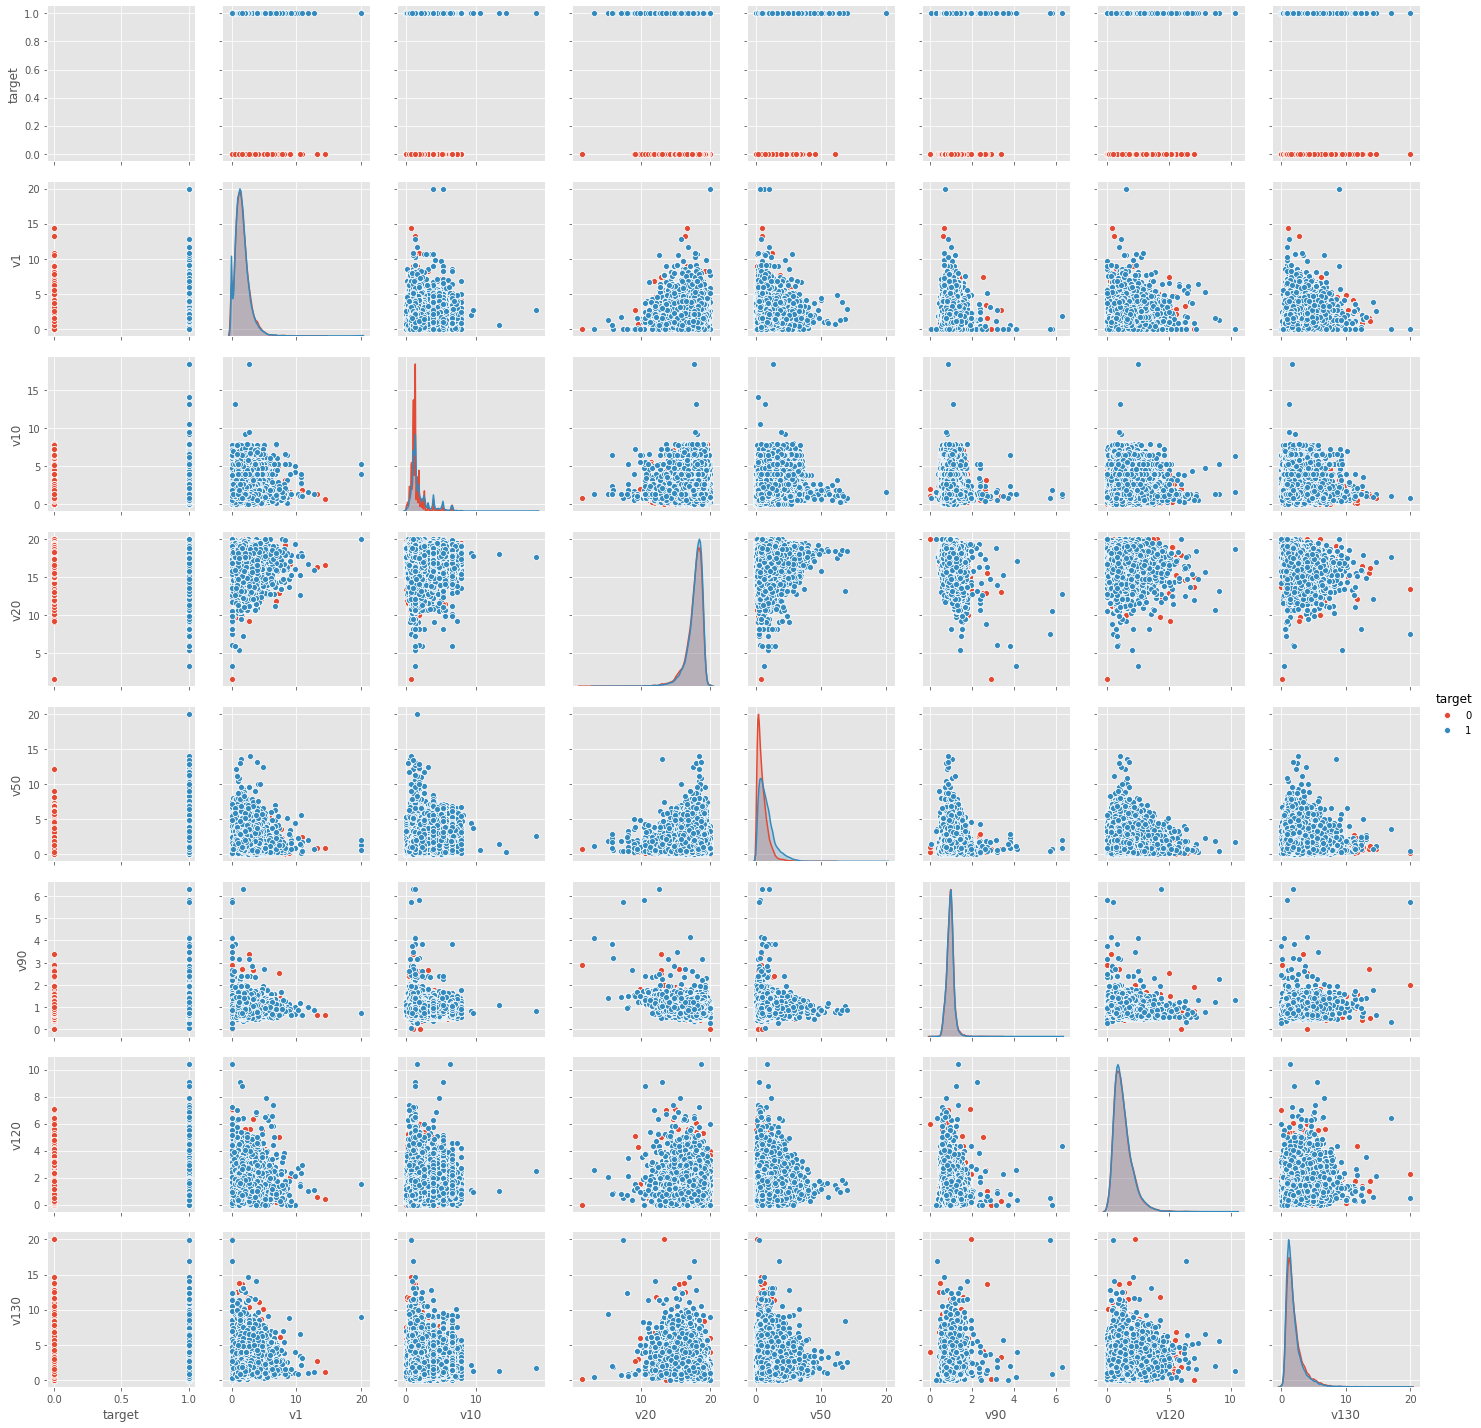

In [15]:
sns.pairplot(data=data_numerical[['target', 'v1', 'v10', 'v20', 'v50', 'v90', 'v120', 'v130']],
            hue='target');

## Baseline 

For baseline model, we drop nans and work with numerical variables

In [16]:
data_numerical_wo_nan = data_numerical.dropna()

In [17]:
y_data = data_numerical_wo_nan['target']
X_data = data_numerical_wo_nan.drop(['target'], axis=1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3)

In [19]:
print('Train shape: ', X_train.shape, 'Test Shape: ', X_test.shape)

Train shape:  (43792, 112) Test Shape:  (18769, 112)


### Model 

#### Scaling  

We should scale our data, since data have different magnitudes.

In [20]:
def scale_data(x_train, x_test):
    scaler = StandardScaler()
    scaler.fit(x_train)
    train_scaled = scaler.transform(x_train)
    test_scaled = scaler.transform(x_test)
    return train_scaled, test_scaled

In [21]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [22]:
model_logR = LogisticRegression(solver='liblinear')
model_logR.fit(X_train_scaled, y_train)
y_pred = model_logR.predict(X_test_scaled)

In [23]:
def quality_report(prediction, actual, verbose=True):
    report_str = "Accuracy: \t {:.3f}\n" +\
                 "Precision: \t {:.3f}\n" +\
                 "Recall: \t {:.3f}\n" +\
                 "F1_score: \t {:.3f}\n" +\
                 "ROC-AUC: \t {:.3f}"
    acc = accuracy_score(prediction, actual)
    precis = precision_score(prediction, actual)
    recall = recall_score(prediction, actual)
    f1_val = f1_score(prediction, actual)
    roc_auc = roc_auc_score(prediction, actual)
    
    quality_list = [acc, precis, recall, f1_val, roc_auc]
    
    if verbose:
        print("\n=== Quality Report ===")
        print(report_str.format(
            accuracy_score(prediction, actual),
            precision_score(prediction, actual),
            recall_score(prediction, actual),
            f1_score(prediction, actual),
            roc_auc_score(prediction, actual)
        ))
        print("======================\n")
    return quality_list 

In [24]:
quality_list_baseline = quality_report(y_pred, y_test)


=== Quality Report ===
Accuracy: 	 0.751
Precision: 	 0.996
Recall: 	 0.753
F1_score: 	 0.857
ROC-AUC: 	 0.641



In [25]:
df_quality = pd.DataFrame(
    [quality_list_baseline],
    columns=["Accuracy", "Precision", "Recall", "F1", "ROC-AUC"],
    index=["baseline"]
)
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.751,0.996,0.753,0.857,0.641


ROC_AUC score is small. Let's improve our model.
1. Look at correlated variables, maybe we should drop some 
2. Fill Nans with some meaningfull values
3. Work on outliers
4. Work with categorical data
5. Apply regularization 

## Data correlation  

In [26]:
def corr_feature_detect(data, threshold=0.8):
    
    corrmat = data.drop(['target'], axis=1).corr()

    corrmat = corrmat.abs().unstack().sort_values(ascending=False)

    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1]

    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    correlated_feats = []

    for row in corrmat.values:
        f1, f2, corr_value = row

        if not ((f1 in correlated_feats) | (f2 in correlated_feats)):
            f1_feat_len = corrmat[(corrmat.feature1==f1) | (corrmat.feature2==f1)].shape[0]
            f2_feat_len = corrmat[(corrmat.feature1==f2) | (corrmat.feature2==f2)].shape[0]

            if f1_feat_len >= f2_feat_len:
                correlated_feats.append(f1)
            else:
                correlated_feats.append(f2)
    
    return correlated_feats

In [27]:
data_num_corr_features = corr_feature_detect(data_numerical, threshold=0.9)
print(data_num_corr_features)

['v58', 'v69', 'v17', 'v46', 'v63', 'v26', 'v48', 'v43', 'v92', 'v25', 'v40', 'v83', 'v97', 'v128', 'v29', 'v89', 'v53', 'v64', 'v41', 'v33', 'v68', 'v15', 'v105', 'v13', 'v32', 'v114', 'v10', 'v65', 'v67', 'v5']


In [28]:
data_num_corr_free = data_numerical.drop(data_num_corr_features, axis=1)

In [29]:
data_numerical.shape, data_num_corr_free.shape

((114321, 113), (114321, 83))

In [30]:
corr = data_numerical[['target', 'v1', 'v10', 'v20', 'v50', 'v90', 'v120', 'v130', 'v58', 'v69', 'v17', 'v46', 'v63', 'v26', 'v48', 'v43']].corr()

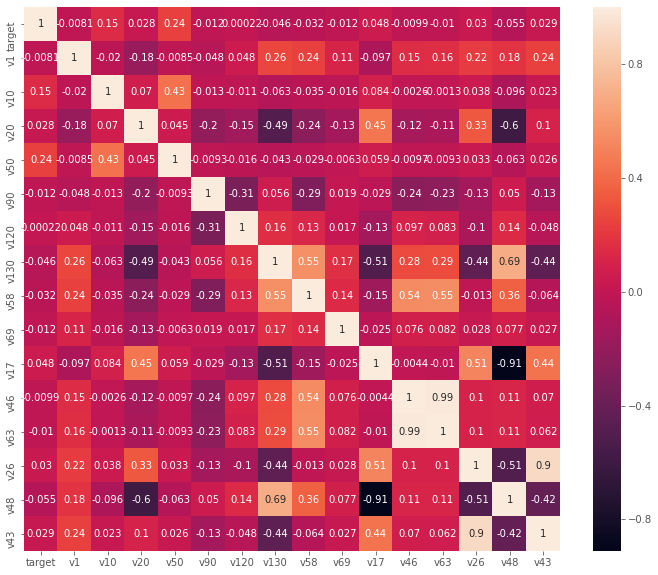

In [31]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True);

# Missing values  

In [32]:
prct_missing = (data.isnull().sum()/data.shape[0] * 100).round(2)
prct_missing.head()
print('\nFeatures with more that 40% NANs: {}/{}'.format(len(prct_missing[prct_missing>40]), len(prct_missing)))


Features with more that 40% NANs: 102/132


In [33]:
prct_missing = (data_num_corr_free.isnull().sum()/data_num_corr_free.shape[0] * 100).round(2)
prct_missing.head()
print('\nFeatures with more that 40% NANs: {}/{}'.format(len(prct_missing[prct_missing>40]), len(prct_missing)))


Features with more that 40% NANs: 73/83


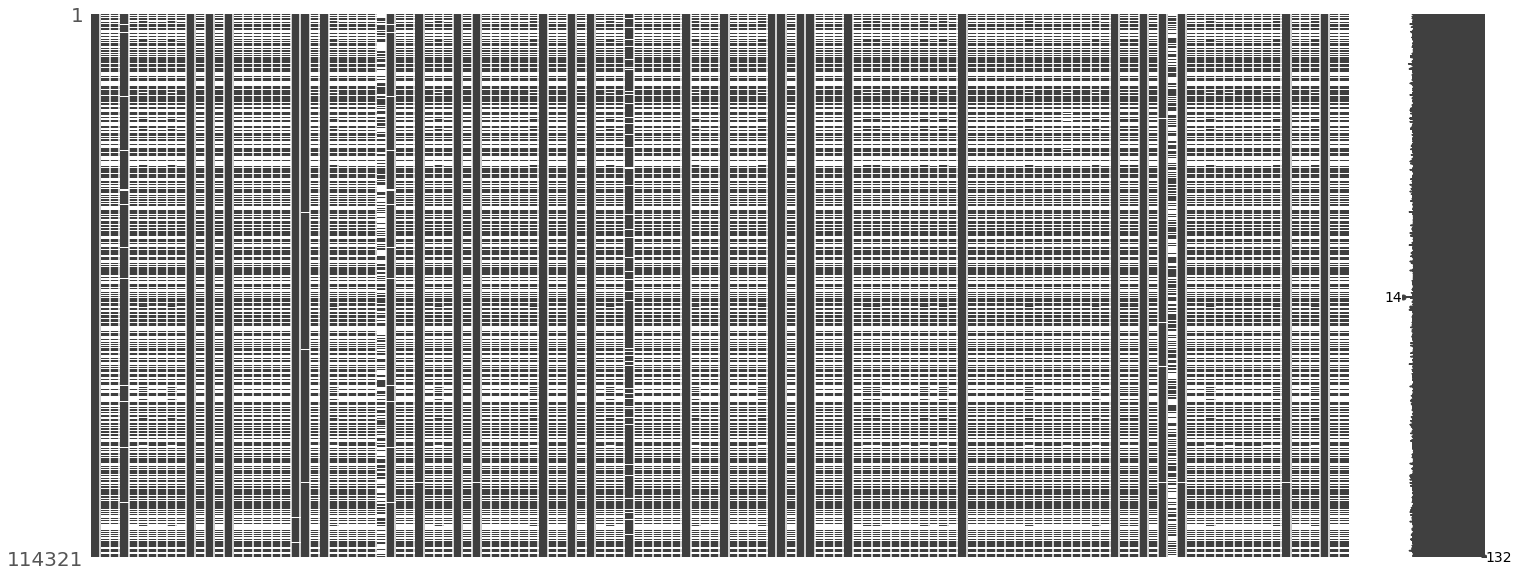

In [34]:
msno.matrix(data)

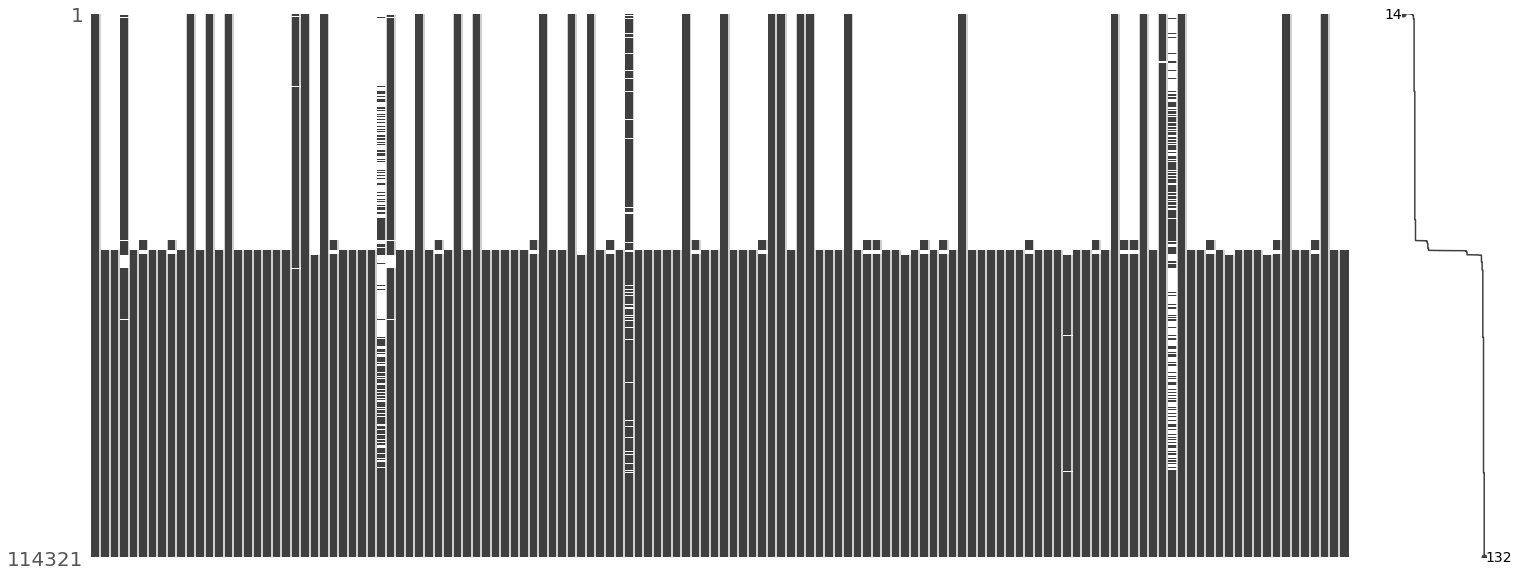

In [35]:
msno.matrix(data, sort='ascending')

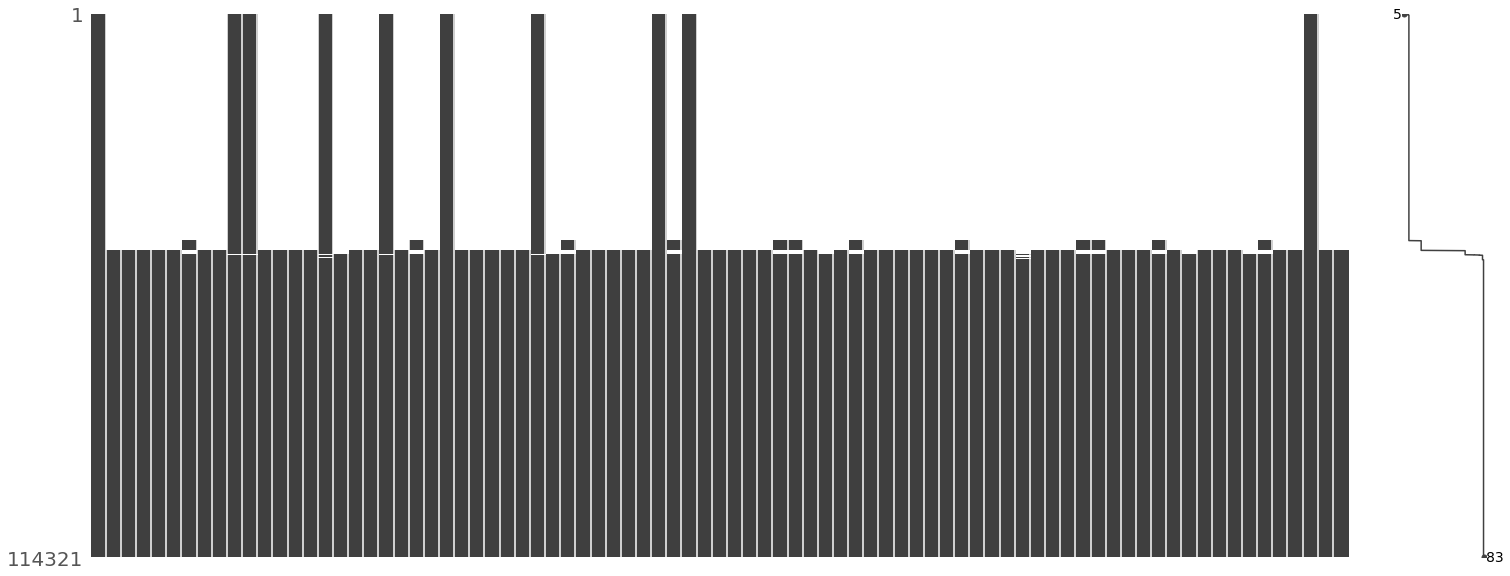

In [36]:
msno.matrix(data_num_corr_free, sort='ascending')

**Какие варианты заполнения пропусков можно предложить?**
- Выкинуть
- Заполнить нулями
- Заполнить очень большим / маленьким значением
- Заполнить средним / медианой / модой
- Дополнить данные переменной-индикатором NaN
- Обучать модели на других признаках для заполнения пропусков

In [39]:
def fill_na(data, strategy='mean', NA_cols=[]):
    data_copy = data.copy(deep=True)
    for c in NA_cols:
        if data_copy[c].isnull().sum() > 0:
            if strategy=='mean':
                data_copy[c] = data_copy[c].fillna(data[c].mean())
            elif strategy=='median':
                data_copy[c] = data_copy[c].fillna(data[c].median())
            elif strategy=='mode':
                data_copy[c] = data_copy[c].fillna(data[c].mode()[0])
    return data_copy

#### Fill NANs with mode 

In [40]:
data_num_fillna = fill_na(data_num_corr_free, strategy='mode', NA_cols=data_num_corr_free.columns[1:])

data_num_fillna.shape

(114321, 83)

In [41]:
data_num_fillna.isnull().sum().sum()

0

In [42]:
def data_split_train_test(data, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),
    data['target'],
    test_size=test_size,
    stratify=data['target'],
    random_state=0)

    print("Train_shape:", X_train.shape, "Test shape:", X_test.shape)
    
    return X_train, X_test, y_train, y_test

In [43]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_fillna)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_corr_nan_mode = quality_report(pred, y_test.values)

Train_shape: (80024, 82) Test shape: (34297, 82)

=== Quality Report ===
Accuracy: 	 0.762
Precision: 	 0.997
Recall: 	 0.763
F1_score: 	 0.864
ROC-AUC: 	 0.666



#### Fill NANs with mean 

In [44]:
data_num_fillna = fill_na(data_num_corr_free, strategy='mean', NA_cols=data_num_corr_free.columns[1:])


In [45]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_fillna)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_corr_nan_mean = quality_report(pred, y_test.values)

Train_shape: (80024, 82) Test shape: (34297, 82)

=== Quality Report ===
Accuracy: 	 0.762
Precision: 	 0.998
Recall: 	 0.763
F1_score: 	 0.865
ROC-AUC: 	 0.678



### Fill NANs with median

In [46]:
data_num_fillna = fill_na(data_num_corr_free, strategy='median', NA_cols=data_num_corr_free.columns[1:])


In [47]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_fillna)
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

model_LogR = LogisticRegression(solver="liblinear")
model_LogR.fit(X_train_scaled, y_train)
pred = model_LogR.predict(X_test_scaled)

quality_list_corr_nan_median = quality_report(pred, y_test.values)

Train_shape: (80024, 82) Test shape: (34297, 82)

=== Quality Report ===
Accuracy: 	 0.762
Precision: 	 0.997
Recall: 	 0.763
F1_score: 	 0.864
ROC-AUC: 	 0.662



In [48]:
df_quality.loc["corr & NaN processed with mode", :] = quality_list_corr_nan_mode
df_quality.loc["corr & NaN processed with mean", :] = quality_list_corr_nan_mean
df_quality.loc["corr & NaN processed with median", :] = quality_list_corr_nan_median


In [49]:
df_quality.round(3)

,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.751,0.996,0.753,0.857,0.641
corr & NaN processed with mode,0.762,0.997,0.763,0.864,0.666
corr & NaN processed with mean,0.762,0.998,0.763,0.865,0.678
corr & NaN processed with median,0.762,0.997,0.763,0.864,0.662


In [65]:
def assess_data(data, df_quality, exp_name, verbose=False):
    X_train, X_test, y_train, y_test = data_split_train_test(data)
    X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

    model_LogR = LogisticRegression(solver="liblinear")
    model_LogR.fit(X_train_scaled, y_train)
    pred = model_LogR.predict(X_test_scaled)

    quality_list = quality_report(pred, y_test.values, verbose=verbose)
    
    df_quality.loc[exp_name, :] = quality_list
    
    return df_quality.round(3)

# Regularization  

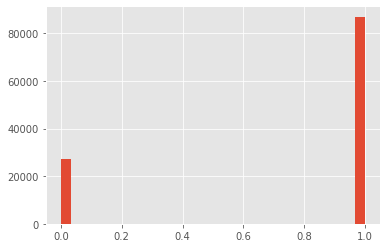

In [51]:
data_num_fillna['target'].hist(bins=30);

We can see that our classes are unbalanced. Let's balance them by taking random 3000 samples from each class.

In [52]:
def get_balanced_sample(data, n=3000):
    data_0 = data[data["target"]==0].sample(n=n)
    data_1 = data[data["target"]==1].sample(n=n)
    return pd.concat([data_0, data_1])

data_num_sample_balanced = get_balanced_sample(data_num_fillna)

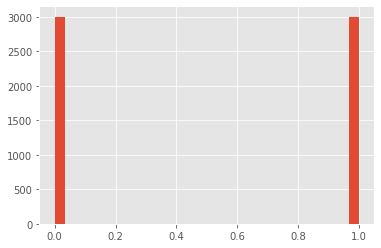

In [53]:
data_num_sample_balanced['target'].hist(bins=30);

In [54]:
X_train, X_test, y_train, y_test = data_split_train_test(data_num_sample_balanced, test_size=0.01)

Train_shape: (5940, 82) Test shape: (60, 82)


In [55]:
X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

In [58]:
def get_reg_coefs(X_train, y_train, feature_columns, penalty="l1"):
    possible_Cs = np.arange(0.001,0.1,0.001)
    coefs_values = []

    for c in possible_Cs:
        model_LogR = LogisticRegression(C=c, penalty=penalty, solver="liblinear")
        model_LogR.fit(X_train_scaled, y_train)
        coefs_values.append(model_LogR.coef_[0])
    
    return pd.DataFrame(coefs_values, columns=feature_columns).sort_index(ascending=False).reset_index(drop=True)

def plot_reg_coefs(coefs_df):
    plt.figure(figsize=(12,6))
    for c in coefs_df.columns:
        plt.plot(coefs_df[c])
    plt.show()

Apply L1 Regularization 

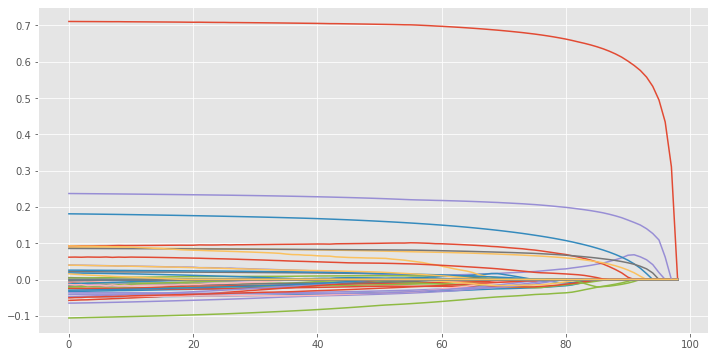

In [59]:
coefs_df_l1 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l1")

plot_reg_coefs(coefs_df_l1)

Apply L2 Regularization 


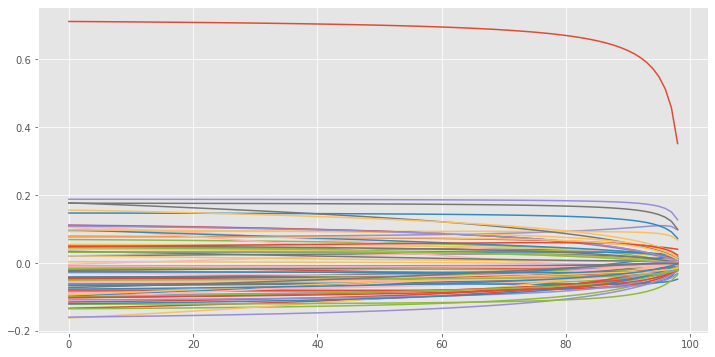

In [60]:
coefs_df_l2 = get_reg_coefs(X_train_scaled, y_train, X_train.columns, penalty="l2")
plot_reg_coefs(coefs_df_l2)

Get important features

In [61]:
def get_important_features(coefs_df_l1, n_feats_limit):
    n_imp_feats = (coefs_df_l1!=0).sum(axis=1)
    index_imp_feats = n_imp_feats[n_imp_feats<=n_feats_limit].index[0]
    row_coef = coefs_df_l1.loc[index_imp_feats, :]
    return row_coef[row_coef!=0].index.tolist()

In [62]:
reg_important_5_features = get_important_features(coefs_df_l1, n_feats_limit=5)

reg_important_10_features = get_important_features(coefs_df_l1, n_feats_limit=10)

reg_important_5_features, reg_important_10_features

(['v14', 'v38', 'v50', 'v72', 'v129'],
 ['v14', 'v21', 'v34', 'v38', 'v50', 'v72', 'v85', 'v123', 'v129'])

In [67]:
df_quality = assess_data(data_num_fillna[["target"]+reg_important_10_features],
                         df_quality, exp_name="regularization_10", verbose=False)

df_quality

Train_shape: (80024, 9) Test shape: (34297, 9)


,Accuracy,Precision,Recall,F1,ROC-AUC
baseline,0.751,0.996,0.753,0.857,0.641
corr & NaN processed with mode,0.762,0.997,0.763,0.864,0.666
corr & NaN processed with mean,0.762,0.998,0.763,0.865,0.678
corr & NaN processed with median,0.762,0.997,0.763,0.864,0.662
regularization_10,0.762,0.998,0.762,0.864,0.672
